In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

This notebook fits the data from Hoffmann and Loeb (2008) paper on the ejection and binary COM velocities in a slingshot interaction. It also fits the mass ratio distribution from this study

In [236]:
import BH_triple_kicks_data as BH_trip

In [2]:
def fit_norm(x,mu,sigma):
    return st.norm.pdf(x,mu,sigma)

def fit_gamma(x,a,loc,scale):
    return st.gamma.pdf(x,a,loc,scale)

def fit_bigamma(x,a1,l1,s1,a2,l2,s2):
    return st.lognorm.pdf(x,a1,l1,s1) + st.lognorm.pdf(x,a2,l2,s2)

def fit_lognorm(x,a,loc,scale):
    return st.lognorm.pdf(x,a,loc,scale)

def fit_chi2(x,df,loc,scale):
    return st.chi2.pdf(x,df,loc,scale)

def fit_bimodal(x,mu1,sigma1,mu2,sigma2):
    return fit_norm(x,mu1,sigma1)+fit_norm(x,mu2,sigma2)

### Ejecta single BH slingshot velocity

In [3]:
#df_trip = pd.read_csv("Data/tripleBH_velocity.csv")
df_trip = pd.read_csv("Data/TripleBH_velocity_modified.csv")
df_trip.head()

,logv,outcome
0,1.397658,0.052632
1,1.468777,0.052632
2,1.487858,0.078947
3,1.555507,0.078947
4,1.578057,0.052632


In [24]:
logv = (df_trip['logv'][1::2].to_numpy() + df_trip['logv'][0::2].to_numpy())/2
percent = (df_trip['outcome'][::2].to_numpy() + df_trip['outcome'][1::2].to_numpy())/2
normalization_factor = np.trapz(percent,logv)
percent = percent/normalization_factor
params, pcov = optimize.curve_fit(fit_norm,logv,percent)
print(params)

[2.87678065 0.31454837]


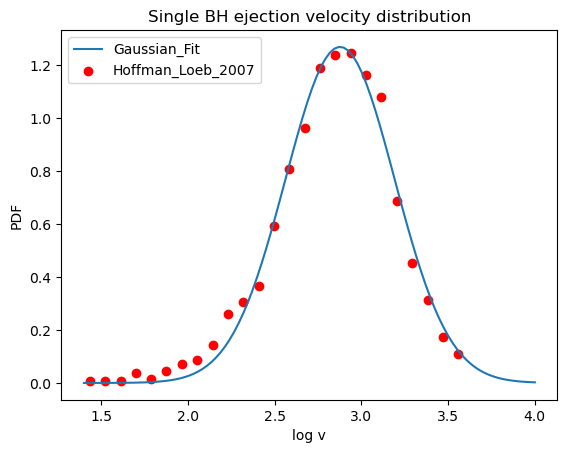

In [25]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Single BH ejection velocity distribution")
plt.savefig("Figures/HL_single_bh_ejection_vel_fit.pdf")

### Recoiled BH binary COM velocity

In [27]:
df = pd.read_csv("Data/COM_velocity_modified.csv")
df.head()

,logv,outcome
0,1.400254,0.721649
1,1.467878,0.721649
2,1.488166,1.185567
3,1.557481,1.159794
4,1.577768,1.932990


In [28]:
logv = (df["logv"][0::2].to_numpy() + df["logv"][1::2].to_numpy())/2
percent = (df["outcome"][0::2].to_numpy() + df["outcome"][1::2].to_numpy())/2

logv_mu =np.mean(logv)
logv_sigma = np.std(logv)

normalization_factor = np.trapz(percent,logv)
percent = percent/normalization_factor

params, pcov = optimize.curve_fit(fit_norm,logv,percent)
print(params)

[2.25688534 0.32633459]


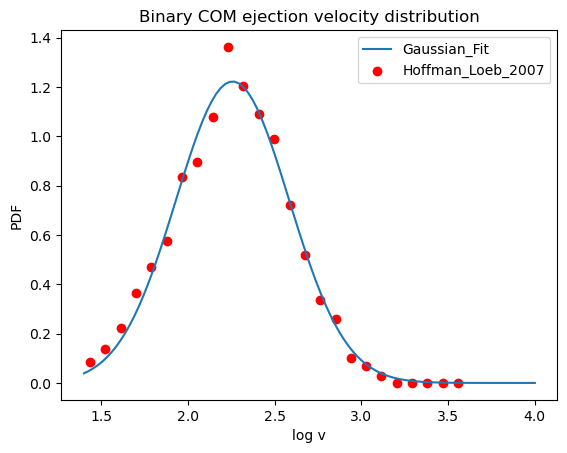

In [29]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Binary COM ejection velocity distribution")
plt.savefig("Figures/HL_binary_bh_ejection_vel_fit.pdf")

In [30]:
from scipy.stats import beta

In [255]:
beta.fit(percent)

(0.8930772703921486,
 1.347185353518386,
 -5.750884419380533e-31,
 1.3827132792864139)

In [257]:
logv = (df_trip['logv'][1::2].to_numpy() + df_trip['logv'][0::2].to_numpy())/2
percent = (df_trip['outcome'][::2].to_numpy() + df_trip['outcome'][1::2].to_numpy())/2
#logv = df_trip['logv'].to_numpy()
#percent = df_trip['outcome'].to_numpy()

In [258]:
normalization_factor = np.trapz(percent,logv)
print(normalization_factor)

8.696626649016299


In [259]:
percent = percent/normalization_factor

In [260]:
params, pcov = optimize.curve_fit(fit_norm,logv,percent)

In [261]:
print(params)

[2.87678065 0.31454837]


Text(0.5, 1.0, 'Single BH ejection velocity distribution')

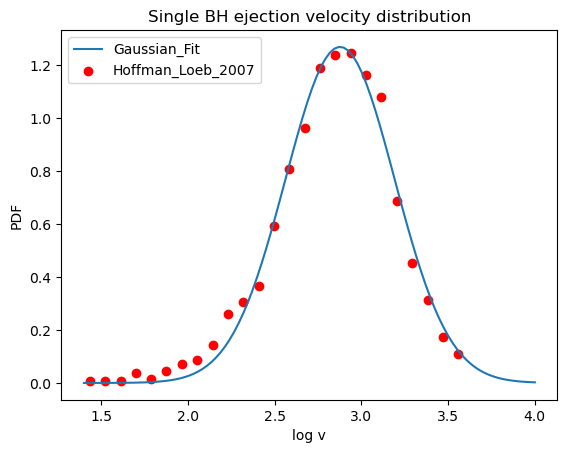

In [262]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Single BH ejection velocity distribution")

### qout fitting

In [31]:
df_qout = pd.read_csv("Data/Triple_qout.csv",index_col=False)
df_qout.head()

,qout,percent
0,0.366197,0.098684
1,1.154930,2.072368
2,1.943662,11.743421
3,2.732394,15.098684
4,3.521127,13.519737


In [33]:
trip_qout = df_qout["qout"].to_numpy()
qout_percent = df_qout["percent"].to_numpy()
normalization_factor = np.trapz(qout_percent,trip_qout)
qout_percent = qout_percent/normalization_factor


params_gamma, pcov = optimize.curve_fit(fit_gamma,trip_qout,qout_percent)
#print(params_gamma)
params_lognorm, pcov = optimize.curve_fit(fit_lognorm,trip_qout,qout_percent)
params_chi2, pcov = optimize.curve_fit(fit_chi2,trip_qout,qout_percent)
params_norm, pcov = optimize.curve_fit(fit_norm,trip_qout,qout_percent)
#params, pcov = optimize.curve_fit(fit_bimodal,trip_qout,qout_percent)
params,pcov = optimize.curve_fit(fit_bigamma,trip_qout,qout_percent)



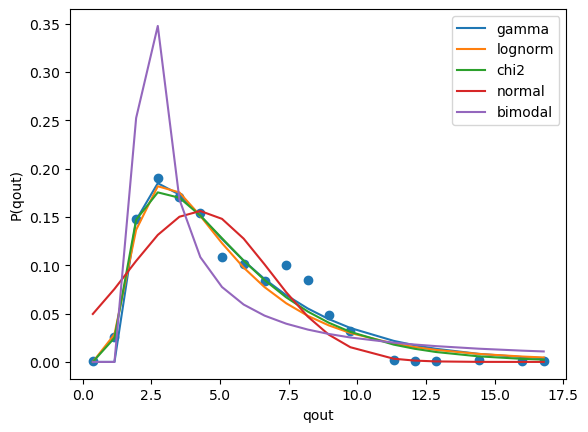

In [34]:
plt.scatter(trip_qout,qout_percent)
plt.plot(trip_qout,fit_gamma(trip_qout,params_gamma[0],params_gamma[1],params_gamma[2]),label="gamma")
plt.plot(trip_qout,fit_lognorm(trip_qout,params_lognorm[0],params_lognorm[1],params_lognorm[2]),label="lognorm")
plt.plot(trip_qout,fit_chi2(trip_qout,params_chi2[0],params_chi2[1],params_chi2[2]),label="chi2")
plt.plot(trip_qout,fit_norm(trip_qout,params_norm[0],params_norm[1]),label="normal")
plt.plot(trip_qout,fit_bigamma(trip_qout,params[0],params[1],params[2],params[3],params[4],params[5]),label="bimodal")
plt.xlabel("qout")
plt.ylabel("P(qout)")
plt.legend()

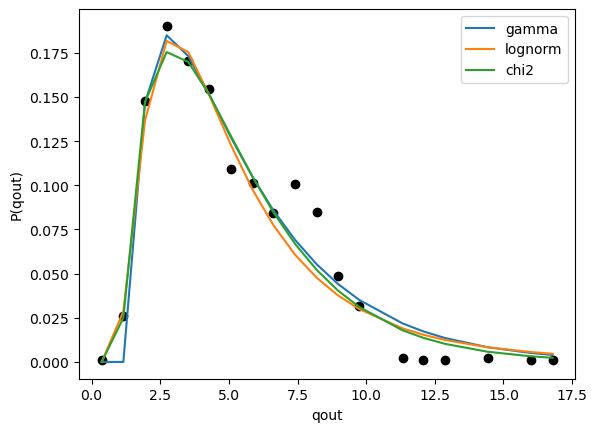

In [37]:
plt.scatter(trip_qout,qout_percent,color="k")
plt.plot(trip_qout,fit_gamma(trip_qout,params_gamma[0],params_gamma[1],params_gamma[2]),label="gamma")
plt.plot(trip_qout,fit_lognorm(trip_qout,params_lognorm[0],params_lognorm[1],params_lognorm[2]),label="lognorm")
plt.plot(trip_qout,fit_chi2(trip_qout,params_chi2[0],params_chi2[1],params_chi2[2]),label="chi2")
plt.xlabel("qout")
plt.ylabel("P(qout)")
plt.legend()

In [38]:
qout_min = 1/np.max(trip_qout)
qout_max = 1/np.min(trip_qout)
print(qout_min,qout_max)

0.05956375838926194 2.730769230769652


--- rough work code below (ignore) ---

In [39]:
#Trip_data = pd.read_csv("Data/Triple_outcomes_N_50.csv")

In [540]:
# M1_mass = Trip_data["M1"]
# M2_mass = Trip_data["M1"]*Trip_data["qin"]
# M3_mass = Trip_data["qout"] * (M1_mass + M2_mass)

Text(0.5, 0, '$\\log(M_3)$')

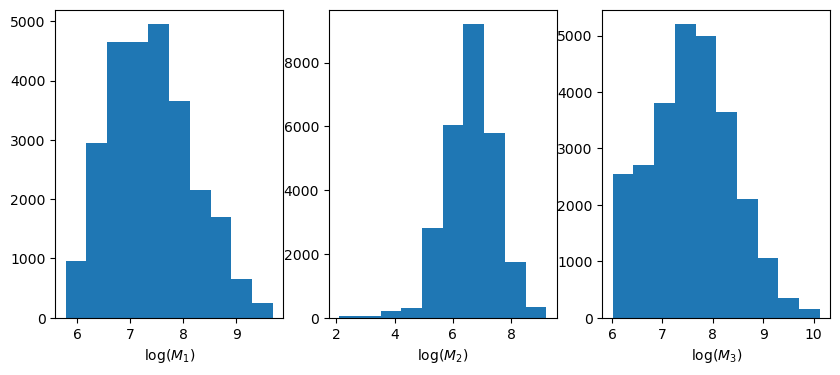

In [544]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].hist(np.log10(M1_mass))
ax[0].set_xlabel("$\log(M_1)$")
ax[1].hist(np.log10(M2_mass))
ax[1].set_xlabel("$\log(M_2)$")
ax[2].hist(np.log10(M3_mass))
ax[2].set_xlabel("$\log(M_3)$")
# ax[3].hist(np.log10(M1_mass+M2_mass+M3_mass))
# ax[3].set_xlabel("$\log(M_{total})$")

In [545]:
N = 50

In [546]:
len(Trip_data)

26550

In [547]:
Trip_data

,M1,qin,qout,z_triple,flag
0,5.074754e+06,0.616776,6.431441,3.257459,No
1,3.064753e+07,0.374258,7.438098,1.101818,No
2,4.390793e+07,0.652869,0.641268,2.201414,Tr-ej
3,1.734791e+07,0.375953,0.092859,3.276165,No
4,8.962945e+05,0.118907,453.836569,1.320180,Tr-12
...,...,...,...,...,...
26545,5.823320e+07,0.184164,1.478060,0.103086,Tr-23
26546,1.542926e+06,0.096727,160.994092,0.016267,Tr-12
26547,4.274809e+06,0.596158,3.163989,0.048085,No
26548,4.234010e+07,0.260972,1.040473,0.015170,Tr-12


In [548]:
def trip_log_v():
    mean = 2.87678065
    stdev = 0.31454837
    return st.norm.rvs(mean,stdev)

In [549]:
def trip_qout():
    a = 1.36869939
    loc = 1.67145567
    scale = 2.91035809
    return st.gamma.rvs(a,loc,scale)

In [550]:
q_HL = 1/trip_qout()
M_tot = 6 * 10**8
m3_HL = (q_HL * M_tot)/(1+q_HL)

In [551]:
def v_without_q_vcut():
    
    kick_vel = []
    qout_array = []
    M_total = []
    m3_array = []
    scale_factor = []

    for i in range(0,531):
        m1 = Trip_data["M1"].iloc[i]
        m2 = (Trip_data["M1"].iloc[i]) * (Trip_data["qin"].iloc[i])
        m3 = Trip_data["qout"].iloc[i] * (m1 + m2)

        if(Trip_data["flag"].iloc[i] == "Tr-ej"):
            #lightest is ejected and other two merges
            m_sort = np.sort([m1,m2,m3])
            m3_array.append( m_sort[0])
            qout = m_sort[0]/(m_sort[1]+m_sort[2])

        elif(Trip_data["flag"].iloc[i] == "Tr-12"):
            qout = m3/(m1 + m2)
            m3_array.append(m3)
            

        elif(Trip_data["flag"].iloc[i] == "Tr-23"):
            qout = m1/(m2+m3)
            m3_array.append(m1)
           
        
        elif(Trip_data["flag"].iloc[i] == "Tr-13"):
            qout = m2/(m1+m3)
            m3_array.append(m2)
            
        
        else:
            m_sort = np.sort([m1,m2,m3])
            qout = m_sort[0]/(m_sort[1]+m_sort[2])
            m3_array.append(m_sort[0])


        qout_array.append(qout)
        
        M_total.append(m1+m2+m3)
        v_HL = trip_log_v()
        q_HL = 1/trip_qout()
        M_tot = 6 * 10**8
        m3_HL = (q_HL * M_tot)/(1+q_HL) 


    #print(m3_HL/m3)
        sf = np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout)))
        scale_factor.append(sf)
        kick_vel.append(sf*10**(v_HL))
    
    return qout_array,m3_array,M_total,scale_factor,kick_vel

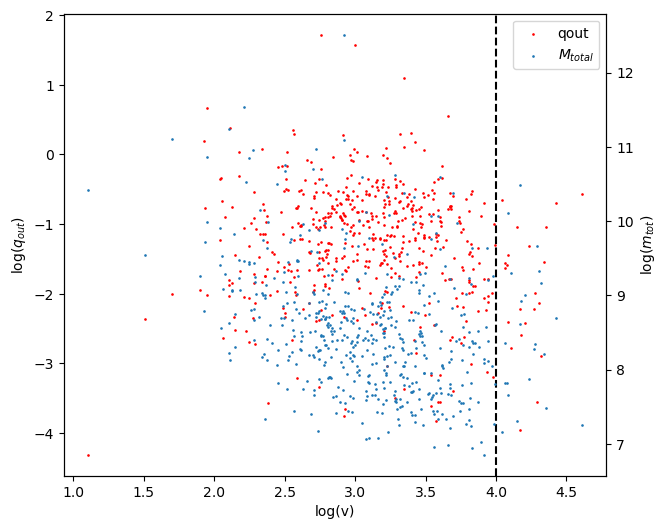

In [552]:
fig, ax1 = plt.subplots(figsize=(7, 6))

ax2 = ax1.twinx()  
ax1.scatter(np.log10(v),np.log10(qout),color="red",s=0.8,label="qout")
ax2.scatter(np.log10(v),np.log10(Mtot),s=0.8,label="$M_{total}$")
ax2.set_ylabel("$\log(m_{tot})$")
ax1.set_ylabel("$\log(q_{out})$")
ax1.axvline(x=4,linestyle="--",color="k")
ax1.set_xlabel("log(v)")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

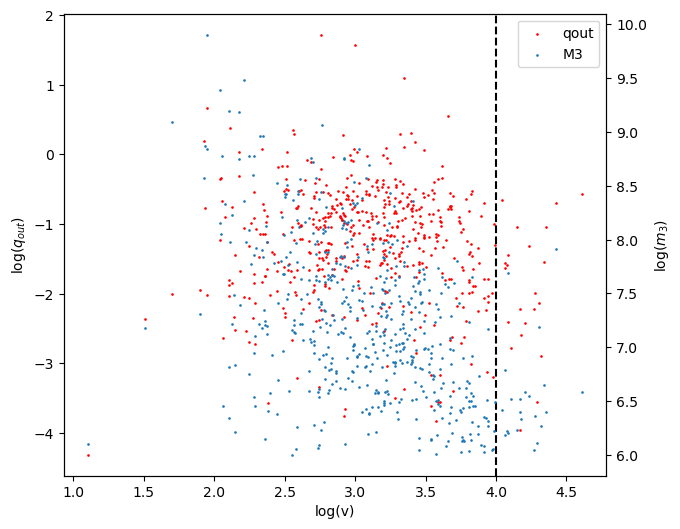

In [553]:
fig, ax1 = plt.subplots(figsize=(7, 6))

ax2 = ax1.twinx()  
ax1.scatter(np.log10(v),np.log10(qout),color="red",s=0.8,label="qout")
ax2.scatter(np.log10(v),np.log10(M3),s=0.8,label="M3")
ax2.set_ylabel("$\log(m_{3})$")
ax1.set_ylabel("$\log(q_{out})$")
ax1.axvline(x=4,linestyle="--",color="k")
ax1.set_xlabel("log(v)")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

In [554]:
def v_with_q_vcut(qcut):
                   
    kick_vel = []
#qout = []
    scale_factor = []

    for i in range(0,531):
        m1 = Trip_data["M1"].iloc[i]
        m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
        m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
        m_sort = np.sort([m1,m2,m3])

        m3 = m_sort[0]
        qout = m_sort[0]/(m_sort[1]+m_sort[2])
    
        if((qout > qcut) & (m3>=10**7)):
            v_HL = trip_log_v()
            q_HL = 1/trip_qout()
            M_tot = 6 * 10**8
            m3_HL = (q_HL * M_tot)/(1+q_HL) 


    #print(m3_HL/m3)
            sf = np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout)))
            scale_factor.append(sf)
            kick_vel.append(sf*10**(v_HL))
    
    return scale_factor,kick_vel


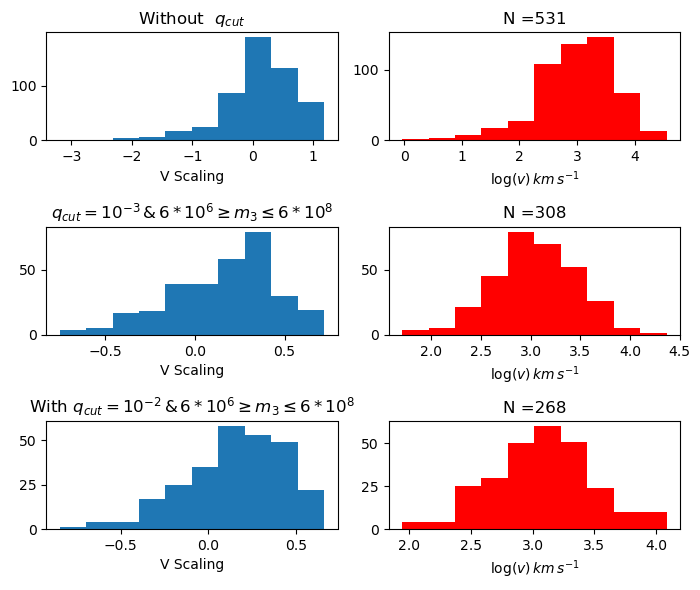

In [555]:
fig,ax = plt.subplots(3,2,figsize=(7,6))
qout,M3,Mtot,sf_noq,v_noq = v_without_q_vcut()
ax[0,0].hist(np.log10(sf_noq))
ax[0,0].set_title("Without  $q_{cut}$")
ax[0,0].set_xlabel("V Scaling")
ax[0,1].set_title("N =%d"%(len(v_noq)))
ax[0,1].set_xlabel("$\log(v) \, km \, s^{-1}$")
ax[0,1].hist(np.log10(v_noq),color="red")

sf_q3,v_q3 = v_with_q_vcut(10**-3)
ax[1,0].hist(np.log10(sf_q3))
ax[1,1].hist(np.log10(v_q3),color="red")
ax[1,0].set_xlabel("V Scaling")
ax[1,1].set_xlabel("$\log(v) \, km \, s^{-1}$")
ax[1,0].set_title(r"$q_{cut} = 10^{-3} \, & \, 6 *10^6 \geq m_3 \leq 6 * 10^8$")
ax[1,1].set_title("N =%d"%(len(v_q3)))


sf_q2,v_q2 = v_with_q_vcut(10**-2)
ax[2,0].hist(np.log10(sf_q2))
ax[2,1].hist(np.log10(v_q2),color="red")
ax[2,0].set_xlabel("V Scaling")
ax[2,1].set_xlabel("$\log(v) \, km \, s^{-1}$")
ax[2,0].set_title(r"With $q_{cut} = 10^{-2} \, & \, 6 * 10^6 \geq m_3 \leq 6 * 10^8$")
ax[2,1].set_title("N =%d"%(len(v_q2)))

plt.tight_layout()

(array([0.04880244, 0.06100305, 0.25621279, 0.54902741, 0.96384811,
        0.85404263, 0.63443167, 0.31721583, 0.06100305, 0.01220061]),
 array([1.7086185 , 1.97473253, 2.24084656, 2.50696059, 2.77307462,
        3.03918865, 3.30530268, 3.57141671, 3.83753074, 4.10364477,
        4.3697588 ]),
 <BarContainer object of 10 artists>)

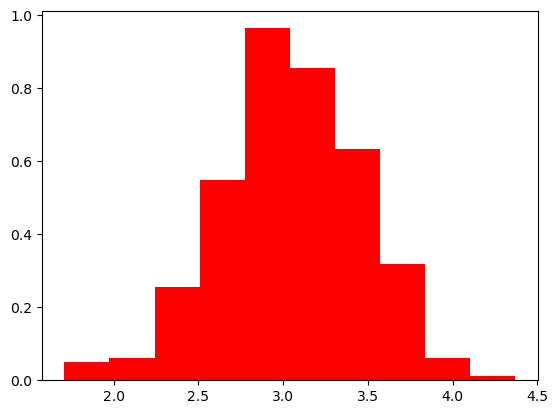

In [556]:
plt.hist(np.log10(v_q3),color="red",density=True)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  4.,
         7., 15.,  9., 20., 16., 24., 24., 30., 24., 25., 23., 15.,  8.,
         7.,  2.,  4.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05,
        2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15,
        3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25,
        4.35, 4.45, 4.55, 4.65, 4.75, 4.85]),
 <BarContainer object of 38 artists>)

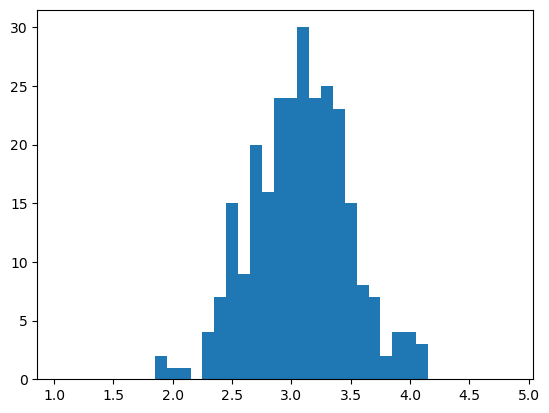

In [557]:
plt.hist(np.log10(v_q2),bins)

In [558]:
v_without_q_vcut()

([0.05411167780763478,
  0.033350775763285344,
  0.3169369990847076,
  0.0928593525051459,
  453.8365688231879,
  0.22784895087534346,
  0.0559022669178797,
  0.0338565935705883,
  0.07903720391526241,
  0.0127337625025565,
  0.137922918210773,
  0.10190651887060483,
  14.550504563051613,
  0.2906202890024635,
  12.636101071800802,
  0.0104720275828085,
  0.0305508606576391,
  0.4146388449140742,
  0.0957316769042476,
  0.05579511770624649,
  0.1408404230433015,
  0.0381846663779174,
  0.08708461948996611,
  0.053572431519003184,
  0.0068788180307007,
  48.01776385391977,
  0.1605971944004726,
  309.1089108910892,
  0.0465357371398883,
  0.12066168819244649,
  0.3980661498415572,
  0.0967031836169555,
  2.716528825872306,
  0.0324035058348051,
  12.502558073279266,
  0.03295379805992748,
  0.9361041138173885,
  0.0656468611833142,
  0.10592846957026691,
  0.0030891804033255,
  0.10676366790797996,
  0.069071982986857,
  3.0215830265058283,
  0.0183298197284097,
  0.4935855578361276,
  

In [559]:
kick_vel = []
#qout = []
scale_factor = []

for i in range(0,531):
    m1 = Trip_data["M1"].iloc[i]
    m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
    m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
    m_sort = np.sort([m1,m2,m3])

    m3 = m_sort[0]
    qout = m_sort[0]/(m_sort[1]+m_sort[2])

    if(qout > 10**-3):
        v_HL = trip_log_v()
        q_HL = 1/trip_qout()
        M_tot = 6 * 10**6
        m3_HL = (q_HL * M_tot)/(1+q_HL) 


    #print(m3_HL/m3)
        sf = np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout)))
        scale_factor.append(sf)
        kick_vel.append(sf*10**(v_HL))

In [560]:
kick_vel = []
#qout = []
scale_factor = []

for i in range(0,531):
    m1 = Trip_data["M1"].iloc[i]
    m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
    m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
    m_sort = np.sort([m1,m2,m3])

    m3 = m_sort[0]
    qout = m_sort[0]/(m_sort[1]+m_sort[2])


    v_HL = trip_log_v()
    q_HL = 1/trip_qout()
    M_tot = 6 * 10**6
    m3_HL = (q_HL * M_tot)/(1+q_HL) 


    #print(m3_HL/m3)
    sf = np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout)))
    scale_factor.append(sf)
    kick_vel.append(sf*10**(v_HL))

In [561]:
len(kick_vel)


531

In [562]:
len(kick_vel)

531

(array([  8.,  32.,  47.,  70.,  93., 119.,  74.,  59.,  22.,   7.]),
 array([0.92988483, 1.19595934, 1.46203385, 1.72810836, 1.99418287,
        2.26025739, 2.5263319 , 2.79240641, 3.05848092, 3.32455543,
        3.59062995]),
 <BarContainer object of 10 artists>)

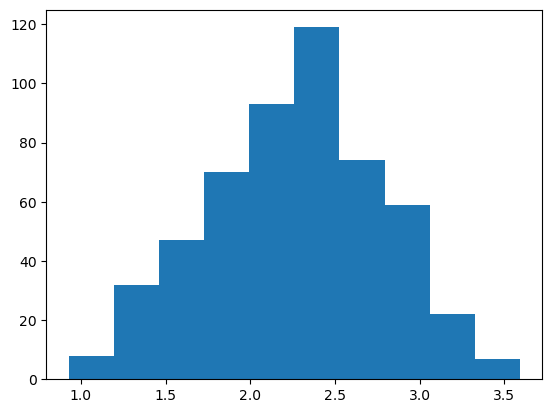

In [563]:
plt.hist(np.log10(kick_vel))

(array([  4.,  14.,  29.,  52.,  80., 100., 114.,  94.,  36.,   8.]),
 array([-1.81151002, -1.600488  , -1.38946597, -1.17844395, -0.96742193,
        -0.7563999 , -0.54537788, -0.33435586, -0.12333384,  0.08768819,
         0.29871021]),
 <BarContainer object of 10 artists>)

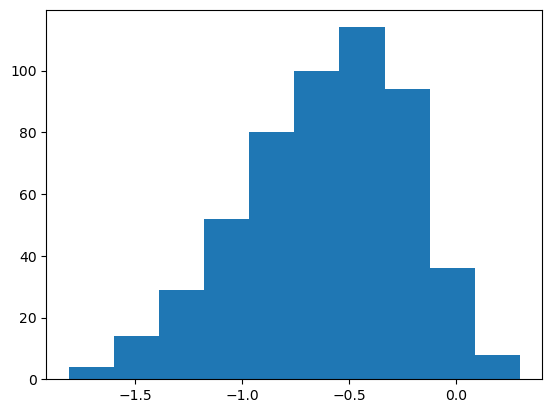

In [564]:
plt.hist(np.log10(scale_factor))

(array([  8.,  32.,  47.,  70.,  93., 119.,  74.,  59.,  22.,   7.]),
 array([0.92988483, 1.19595934, 1.46203385, 1.72810836, 1.99418287,
        2.26025739, 2.5263319 , 2.79240641, 3.05848092, 3.32455543,
        3.59062995]),
 <BarContainer object of 10 artists>)

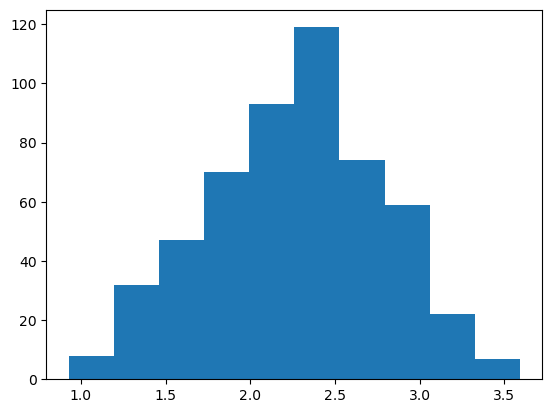

In [565]:
plt.hist(np.log10(kick_vel))

(array([  4.,  14.,  29.,  52.,  80., 100., 114.,  94.,  36.,   8.]),
 array([-1.81151002, -1.600488  , -1.38946597, -1.17844395, -0.96742193,
        -0.7563999 , -0.54537788, -0.33435586, -0.12333384,  0.08768819,
         0.29871021]),
 <BarContainer object of 10 artists>)

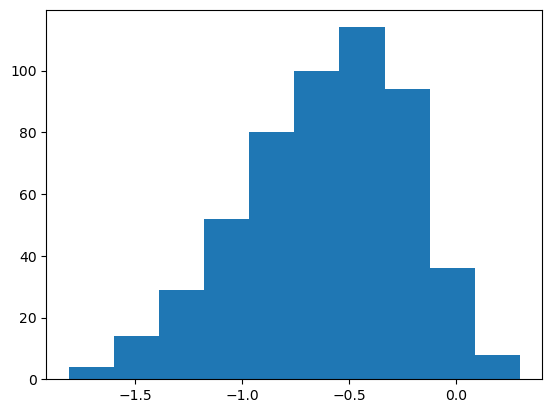

In [566]:
plt.hist(np.log10(scale_factor))

(array([  4.,  14.,  29.,  52.,  80., 100., 114.,  94.,  36.,   8.]),
 array([-1.81151002, -1.600488  , -1.38946597, -1.17844395, -0.96742193,
        -0.7563999 , -0.54537788, -0.33435586, -0.12333384,  0.08768819,
         0.29871021]),
 <BarContainer object of 10 artists>)

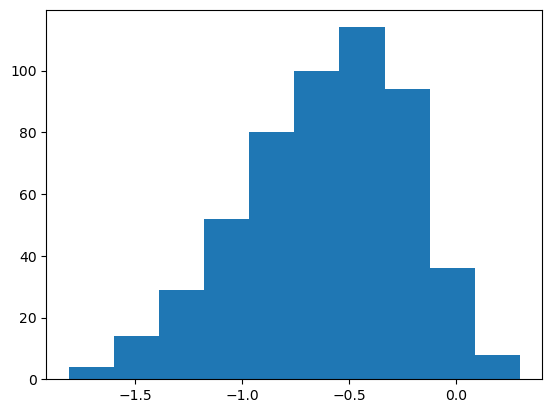

In [567]:
plt.hist(np.log10(scale_factor))

(array([  3.,  26.,  65., 117., 149.,  94.,  51.,  18.,   6.,   2.]),
 array([-3.04842187, -2.34115567, -1.63388948, -0.92662328, -0.21935709,
         0.4879091 ,  1.1951753 ,  1.90244149,  2.60970769,  3.31697388,
         4.02424007]),
 <BarContainer object of 10 artists>)

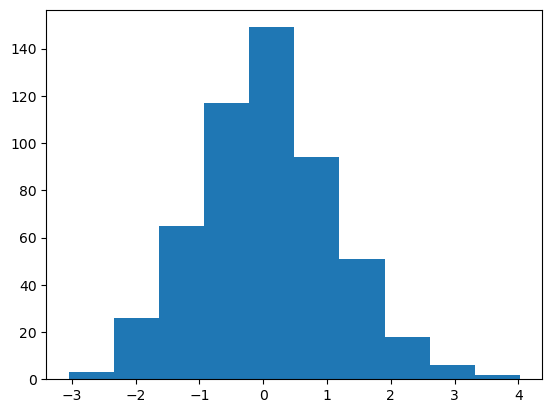

In [568]:
plt.hist(np.log10(Trip_data["qout"][0:531]))

In [569]:
vcount = []
v_max = 4.9
v_min = 1
v_binsize = 0.1
binss = []
for i in range(N):
   slingshot_kicks = []
   for j in range(531*i,531*(i+1)):
      m1 = Trip_data["M1"].iloc[i]
      m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
      m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
      m_sort = np.sort([m1,m2,m3])

      m3 = m_sort[0]
      qout = m_sort[0]/(m_sort[1]+m_sort[2])
      slingshot_kicks.append(BH_trip.v_scaled(m3,qout))

   bincounts,binedges = np.histogram(np.log10(slingshot_kicks),range=(v_min,v_max),bins=int((v_max-v_min)/v_binsize),density=True)
   bins = binedges[:-1] + (binedges[1] - binedges[0])/2
   binss.append(bins)
   vcount.append(bincounts)               

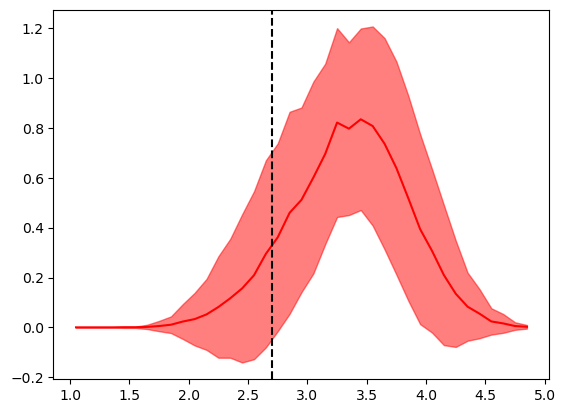

In [570]:
plt.plot(bins,np.mean(vcount,axis=0),color="red")
plt.axvline(x = np.log10(500),color = "k",linestyle = "--")
plt.fill_between(bins,np.mean(vcount,axis=0)-np.std(vcount,axis=0),np.mean(vcount,axis=0)+np.std(vcount,axis=0),color="red",alpha=0.5)

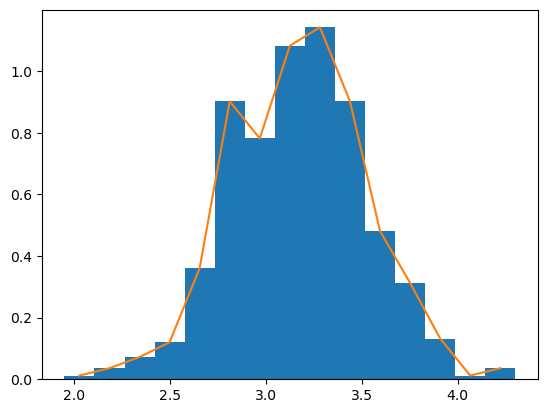

In [571]:
bincounts = plt.hist(np.log10(slingshot_kicks),bins=15,density=True)
counts = bincounts[0]
binedges = bincounts[1]
bins = binedges[:-1] + (binedges[1] - binedges[0])/2
plt.plot(bins,counts)